<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Constructing an efficient frontier

In [1]:
import pandas_datareader.data as web
import numpy as np, pandas as pd, scipy as sp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
p = print

In [2]:
tickers = ['IBM', 'MSFT']
df = web.DataReader(tickers,'yahoo','01/01/2010','10/18/2019')['Adj Close']
returns = df.pct_change().dropna()
mean_return = returns.mean()
return_stdev = round(returns.std(),4)
cov_matrix = returns.cov()

In [3]:
# nDays = 252
# # initial portfolio weights
# weights = np.asarray([0.5,0.5])
# portfolio_return = round(np.dot(weights, mean_return) * nDays,4)
# portfolio_stdev = round(sp.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * sp.sqrt(nDays) ,4)
# p(f'The {weights} portfolio annualized expected return is {portfolio_return}, an volatility is {portfolio_stdev}.')

In [4]:
# rf = 0.0003 # risk-free rate of return
# sharpe_ratio = round((portfolio_return - rf) / portfolio_stdev,4)
# p(f'The {weights} portfolio sharpe ratio is {sharpe_ratio}.')

In [5]:
# # new portfolio weights
# weights = np.asarray([0.6,0.4])
# portfolio_return = round(np.dot(weights, mean_return) * nDays,4)
# portfolio_stdev = round(sp.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * sp.sqrt(nDays) ,4)
# p(f'The {weights} portfolio annualized expected return is {portfolio_return}, an volatility is {portfolio_stdev}.')
# sharpe_ratio = round((portfolio_return - rf) / portfolio_stdev,4)
# p(f'The {weights} portfolio sharpe ratio is {sharpe_ratio}.')

In [6]:
rf = 0.00003 # risk-free rate retrun
num_portfolios = 25000

results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights, mean_return) * 252
    portfolio_stdev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights))) * np.sqrt(252)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    results[2,i] = (results[0,i] - rf) / results[1,i]
    
# results_df = pd.DataFrame(results.T, columns=['Ret','Vol','Sharpe'])
# plt.scatter(results_df.Vol, results_df.Ret, c=results_df.Sharpe, cmap='RdYlGn')
# plt.xlabel('Volatility')
# plt.ylabel('Returns')
# plt.title('2-stock Portfolio Efficient Frontier')
# plt.colorbar();

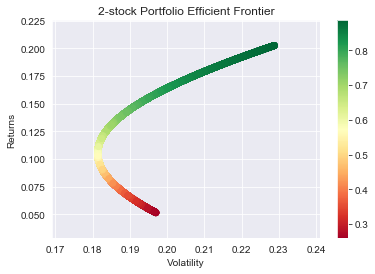

In [7]:
results_df = pd.DataFrame(results.T, columns=['Ret','Vol','Sharpe'])
plt.scatter(results_df.Vol, results_df.Ret, c=results_df.Sharpe, cmap='RdYlGn')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('2-stock Portfolio Efficient Frontier')
plt.colorbar();

In [8]:
tickers = ['AAPL','IBM', 'MSFT', 'WMT']
df = web.DataReader(tickers,'yahoo','01/01/2010','10/18/2019')['Adj Close']
returns = df.pct_change().dropna()
mean_return = returns.mean()
return_stdev = returns.std()
cov_matrix = returns.cov()

In [9]:
df.to_csv('efficient_frontier_data.csv')

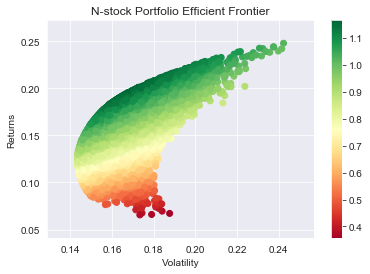

In [10]:
rf = 0.00003 # risk-free rate retrun
num_portfolios = 25000

results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights, mean_return) * 252
    portfolio_stdev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights))) * np.sqrt(252)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    results[2,i] = (results[0,i] - rf) / results[1,i]
    
results_df = pd.DataFrame(results.T, columns=['Ret','Vol','Sharpe'])
plt.scatter(results_df.Vol, results_df.Ret, c=results_df.Sharpe, cmap='RdYlGn')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('N-stock Portfolio Efficient Frontier')
plt.colorbar();